In [2]:
# 라이브러리 가져오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# css 데이터 읽어오기 + 정보 살펴보기

In [3]:
# css 데이터 읽어오기
css_df = pd.read_csv('css/train.csv')
css_df.head()

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,TRAIN_00000,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,TRAIN_00001,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,TRAIN_00002,12000000,36 months,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A
3,TRAIN_00003,14400000,36 months,8 years,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C
4,TRAIN_00004,18000000,60 months,Unknown,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B


In [4]:
# css 데이터 정보 살펴보기
css_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96294 entries, 0 to 96293
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            96294 non-null  object 
 1   대출금액          96294 non-null  int64  
 2   대출기간          96294 non-null  object 
 3   근로기간          96294 non-null  object 
 4   주택소유상태        96294 non-null  object 
 5   연간소득          96294 non-null  int64  
 6   부채_대비_소득_비율   96294 non-null  float64
 7   총계좌수          96294 non-null  int64  
 8   대출목적          96294 non-null  object 
 9   최근_2년간_연체_횟수  96294 non-null  int64  
 10  총상환원금         96294 non-null  int64  
 11  총상환이자         96294 non-null  float64
 12  총연체금액         96294 non-null  float64
 13  연체계좌수         96294 non-null  float64
 14  대출등급          96294 non-null  object 
dtypes: float64(4), int64(5), object(6)
memory usage: 11.0+ MB


In [5]:
# css 데이터 기술통계량 살펴보기
css_df.describe(include = 'all')

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
count,96294,9.629400e+04,96294,96294,96294,9.629400e+04,96294.000000,96294.000000,96294,96294.000000,9.629400e+04,9.629400e+04,96294.000000,96294.000000,96294
unique,96294,NaN,2,16,4,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,7
top,TRAIN_00000,NaN,36 months,10+ years,MORTGAGE,NaN,NaN,NaN,부채 통합,NaN,NaN,NaN,NaN,NaN,B
freq,1,NaN,64479,31585,47934,NaN,NaN,NaN,55150,NaN,NaN,NaN,NaN,NaN,28817
mean,NaN,1.830400e+07,NaN,NaN,NaN,9.392672e+07,19.379590,25.304827,NaN,0.345681,8.225035e+05,4.282282e+05,54.380584,0.005805,NaN
std,NaN,1.032908e+07,NaN,NaN,NaN,9.956871e+07,33.569559,12.088566,NaN,0.919119,1.027745e+06,4.402111e+05,1414.769218,0.079966,NaN
min,NaN,1.200000e+06,NaN,NaN,NaN,0.000000e+00,0.000000,4.000000,NaN,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,NaN
25%,NaN,1.020000e+07,NaN,NaN,NaN,5.760000e+07,12.650000,17.000000,NaN,0.000000,3.075720e+05,1.346160e+05,0.000000,0.000000,NaN
50%,NaN,1.680000e+07,NaN,NaN,NaN,7.800000e+07,18.740000,24.000000,NaN,0.000000,5.976960e+05,2.870040e+05,0.000000,0.000000,NaN
75%,NaN,2.400000e+07,NaN,NaN,NaN,1.128000e+08,25.540000,32.000000,NaN,0.000000,1.055076e+06,5.702160e+05,0.000000,0.000000,NaN


- min 특이사항
    - [연간소득]이 0원인 사람도 있음
    - [부채_대비_소득_비율]이 0원인 사람도 있음
    - 그런데 계좌는 적어도 4개 가지고 있음
- max 특이사항
    - [부채_대비_소득_비율]이 9999임  .. 뭐지?
    - [총계좌수] 분포의 75%사람까지는 32개였다가 갑자기 max로 169개를 가진 사람이 등장함
    - [총연체금액]이 0000이다가 갑자기 max값이 75768임

# css 데이터 전처리

## 범주형 데이터

### 범주형 데이터 분포 살펴보기

In [6]:
# 한글 깨짐 해결
# 출처: https://giveme-happyending.tistory.com/168 [소연의_개발일지:티스토리]
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

C:\Users\LG\AppData\Local\Temp\ipykernel_11688\168578128.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0,1].set_xticklabels(ax[0,1].get_xticklabels(), rotation=45)
C:\Users\LG\AppData\Local\Temp\ipykernel_11688\168578128.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1,1].set_xticklabels(ax[1,1].get_xticklabels(), rotation=45)


[Text(0, 0, '부채 통합'),
 Text(1, 0, '주택 개선'),
 Text(2, 0, '주요 구매'),
 Text(3, 0, '휴가'),
 Text(4, 0, '의료'),
 Text(5, 0, '자동차'),
 Text(6, 0, '신용 카드'),
 Text(7, 0, '소규모 사업'),
 Text(8, 0, '기타'),
 Text(9, 0, '이사'),
 Text(10, 0, '주택'),
 Text(11, 0, '재생 에너지')]

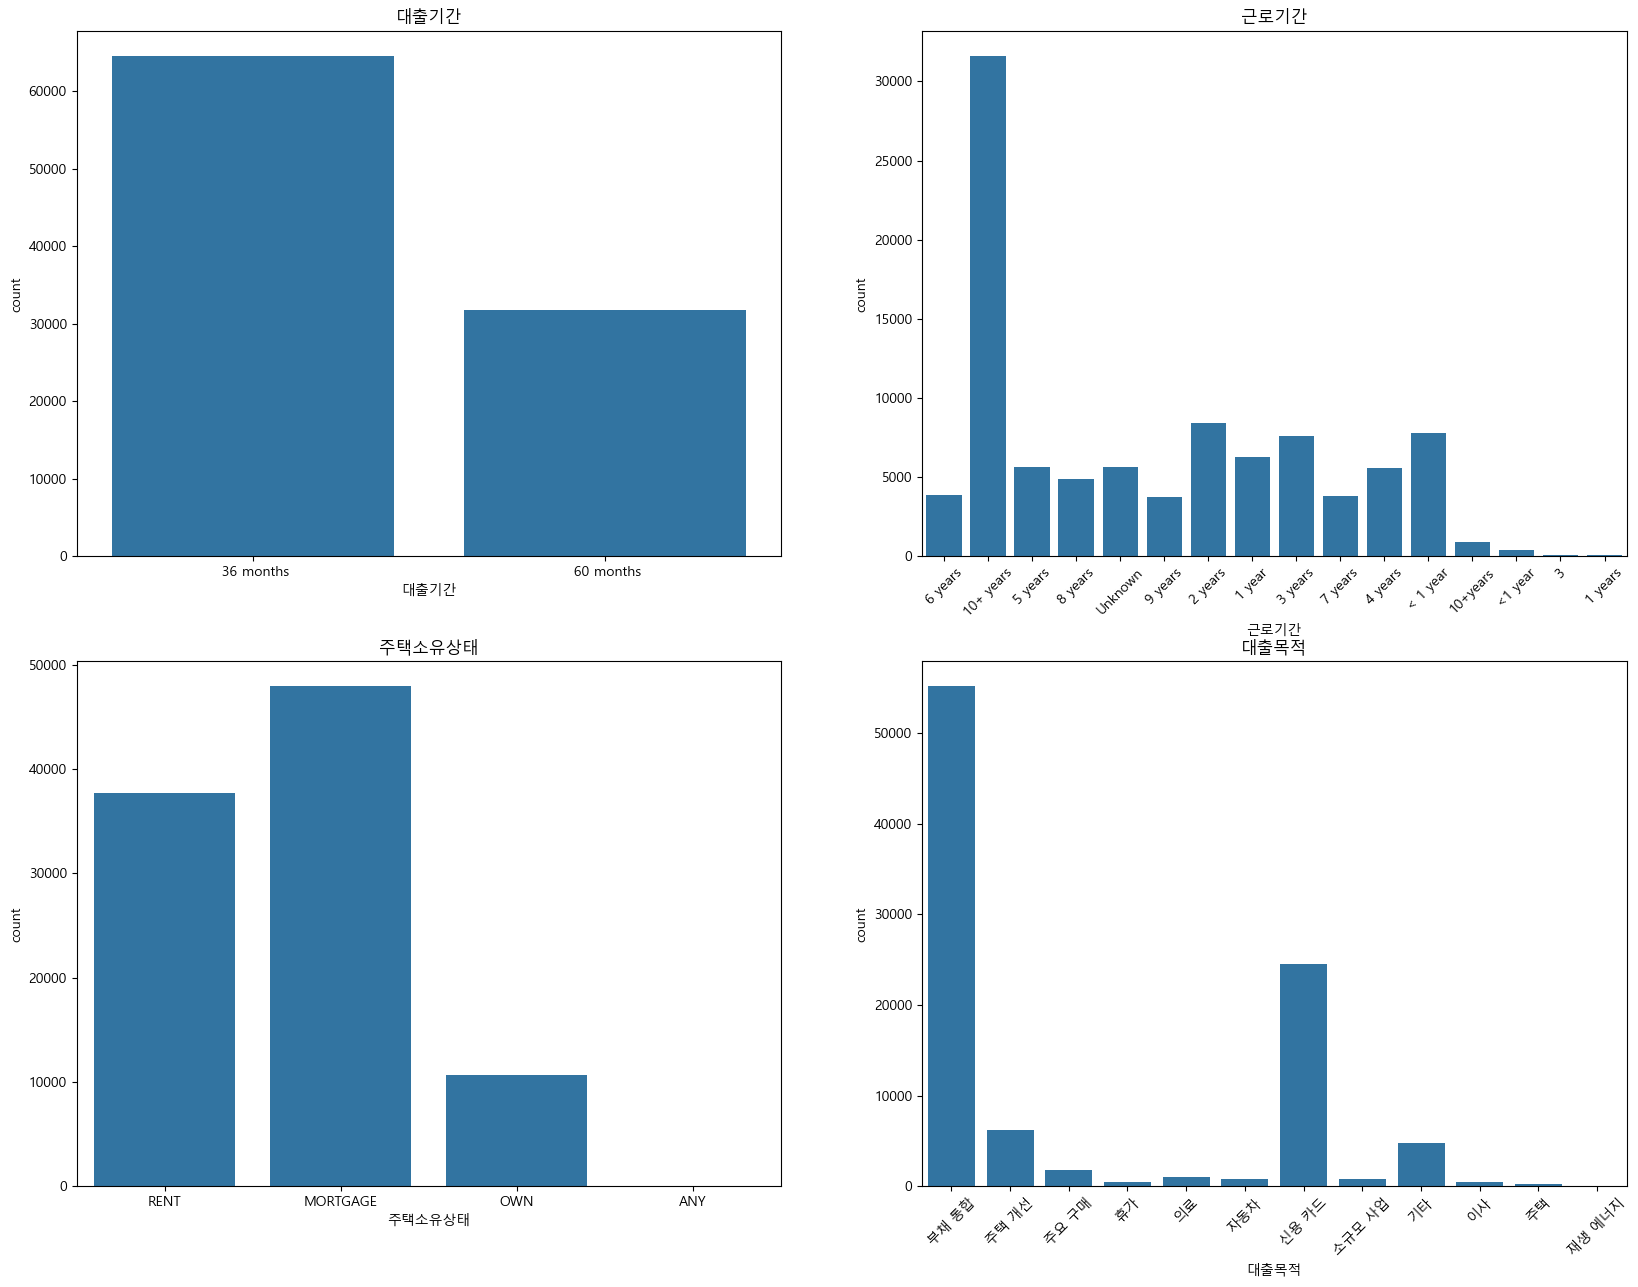

In [7]:
# subplot으로 여러 그래프 한 번에 그리기
fig, ax = plt.subplots(2,2, figsize=(20,15))

sns.countplot(css_df, x='대출기간', ax=ax[0,0]).set_title('대출기간')
sns.countplot(css_df, x='근로기간', ax=ax[0,1]).set_title('근로기간')
ax[0,1].set_xticklabels(ax[0,1].get_xticklabels(), rotation=45)
sns.countplot(css_df, x='주택소유상태', ax=ax[1,0]).set_title('주택소유상태')
sns.countplot(css_df, x='대출목적', ax=ax[1,1]).set_title('대출목적')
ax[1,1].set_xticklabels(ax[1,1].get_xticklabels(), rotation=45)

- [대출기간] 36개월, 60개월로 통일되어 있음 (36개월이 거의 두 배 가까이 많음)
- [근로기간]
    - Unknown이 있음
    - 1 year와 1 years가 있음
    - 3 years와 3이 있음
    - <1 year와 < 1 year가 있음
    - 10+ years와 10+years가 있음
- [주택소유상태] MORTGAGE가 제일 많고, RENT가 그 다음
- [대출목적] 부채통합이 월등히 많고, 신용카드가 두 번째로 많음

### 근로기간 데이터 정리
- Unknown은 삭제하는 게 맞는 건지 확신이 없어서 일단 그대로 둠
- 1 year로 통일
- 3 years로 통일
- <1 year로 통일
- +10 years로 통일

In [8]:
def change_working_year(x):
    if x == '1 years':
        return '1 year'
    elif x == '3' :
        return '3 years'
    elif x == '10+years':
        return '10+ years'
    elif x == '< 1 year':
        return '<1 year'
    else:
        return x

In [9]:
css_df['근로기간'] = css_df['근로기간'].apply(change_working_year)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, '6 years'),
  Text(1, 0, '10+ years'),
  Text(2, 0, '5 years'),
  Text(3, 0, '8 years'),
  Text(4, 0, 'Unknown'),
  Text(5, 0, '9 years'),
  Text(6, 0, '2 years'),
  Text(7, 0, '1 year'),
  Text(8, 0, '3 years'),
  Text(9, 0, '7 years'),
  Text(10, 0, '4 years'),
  Text(11, 0, '<1 year')])

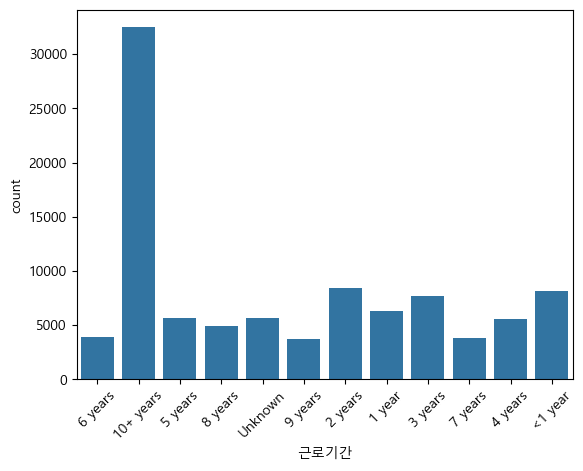

In [10]:
# 범주 잘 바뀌었는지 확인
sns.countplot(css_df, x='근로기간')
plt.xticks(rotation=45)

### 범주형 데이터 전처리(인코딩)

- 다 그냥 LableEencoding 해버림

In [33]:
# 아직 실행 노노
from sklearn.preprocessing import LabelEncoder

le_list = ['대출기간', '근로기간', '주택소유상태', '대출목적']

def get_le(df):
    for i in le_list:
        le = LabelEncoder()
        le = le.fit(df[i]) 
        df[i]=le.transform(df[i])

In [36]:
get_le(css_df)
css_df.head()

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,TRAIN_00000,12480000,0,6,3,72000000,18.90,15,1,0,0,0.0,0.0,0.0,C
1,TRAIN_00001,14400000,1,1,1,130800000,22.33,21,10,0,373572,234060.0,0.0,0.0,B
2,TRAIN_00002,12000000,0,5,1,96000000,8.60,14,1,0,928644,151944.0,0.0,0.0,A
3,TRAIN_00003,14400000,0,8,1,132000000,15.09,15,1,0,325824,153108.0,0.0,0.0,C
4,TRAIN_00004,18000000,1,11,3,71736000,25.39,19,8,0,228540,148956.0,0.0,0.0,B


## 수치형 데이터

### 수치형 데이터 분포 확인하기

Text(0.5, 1.0, '최근_2년간_연체_횟수')

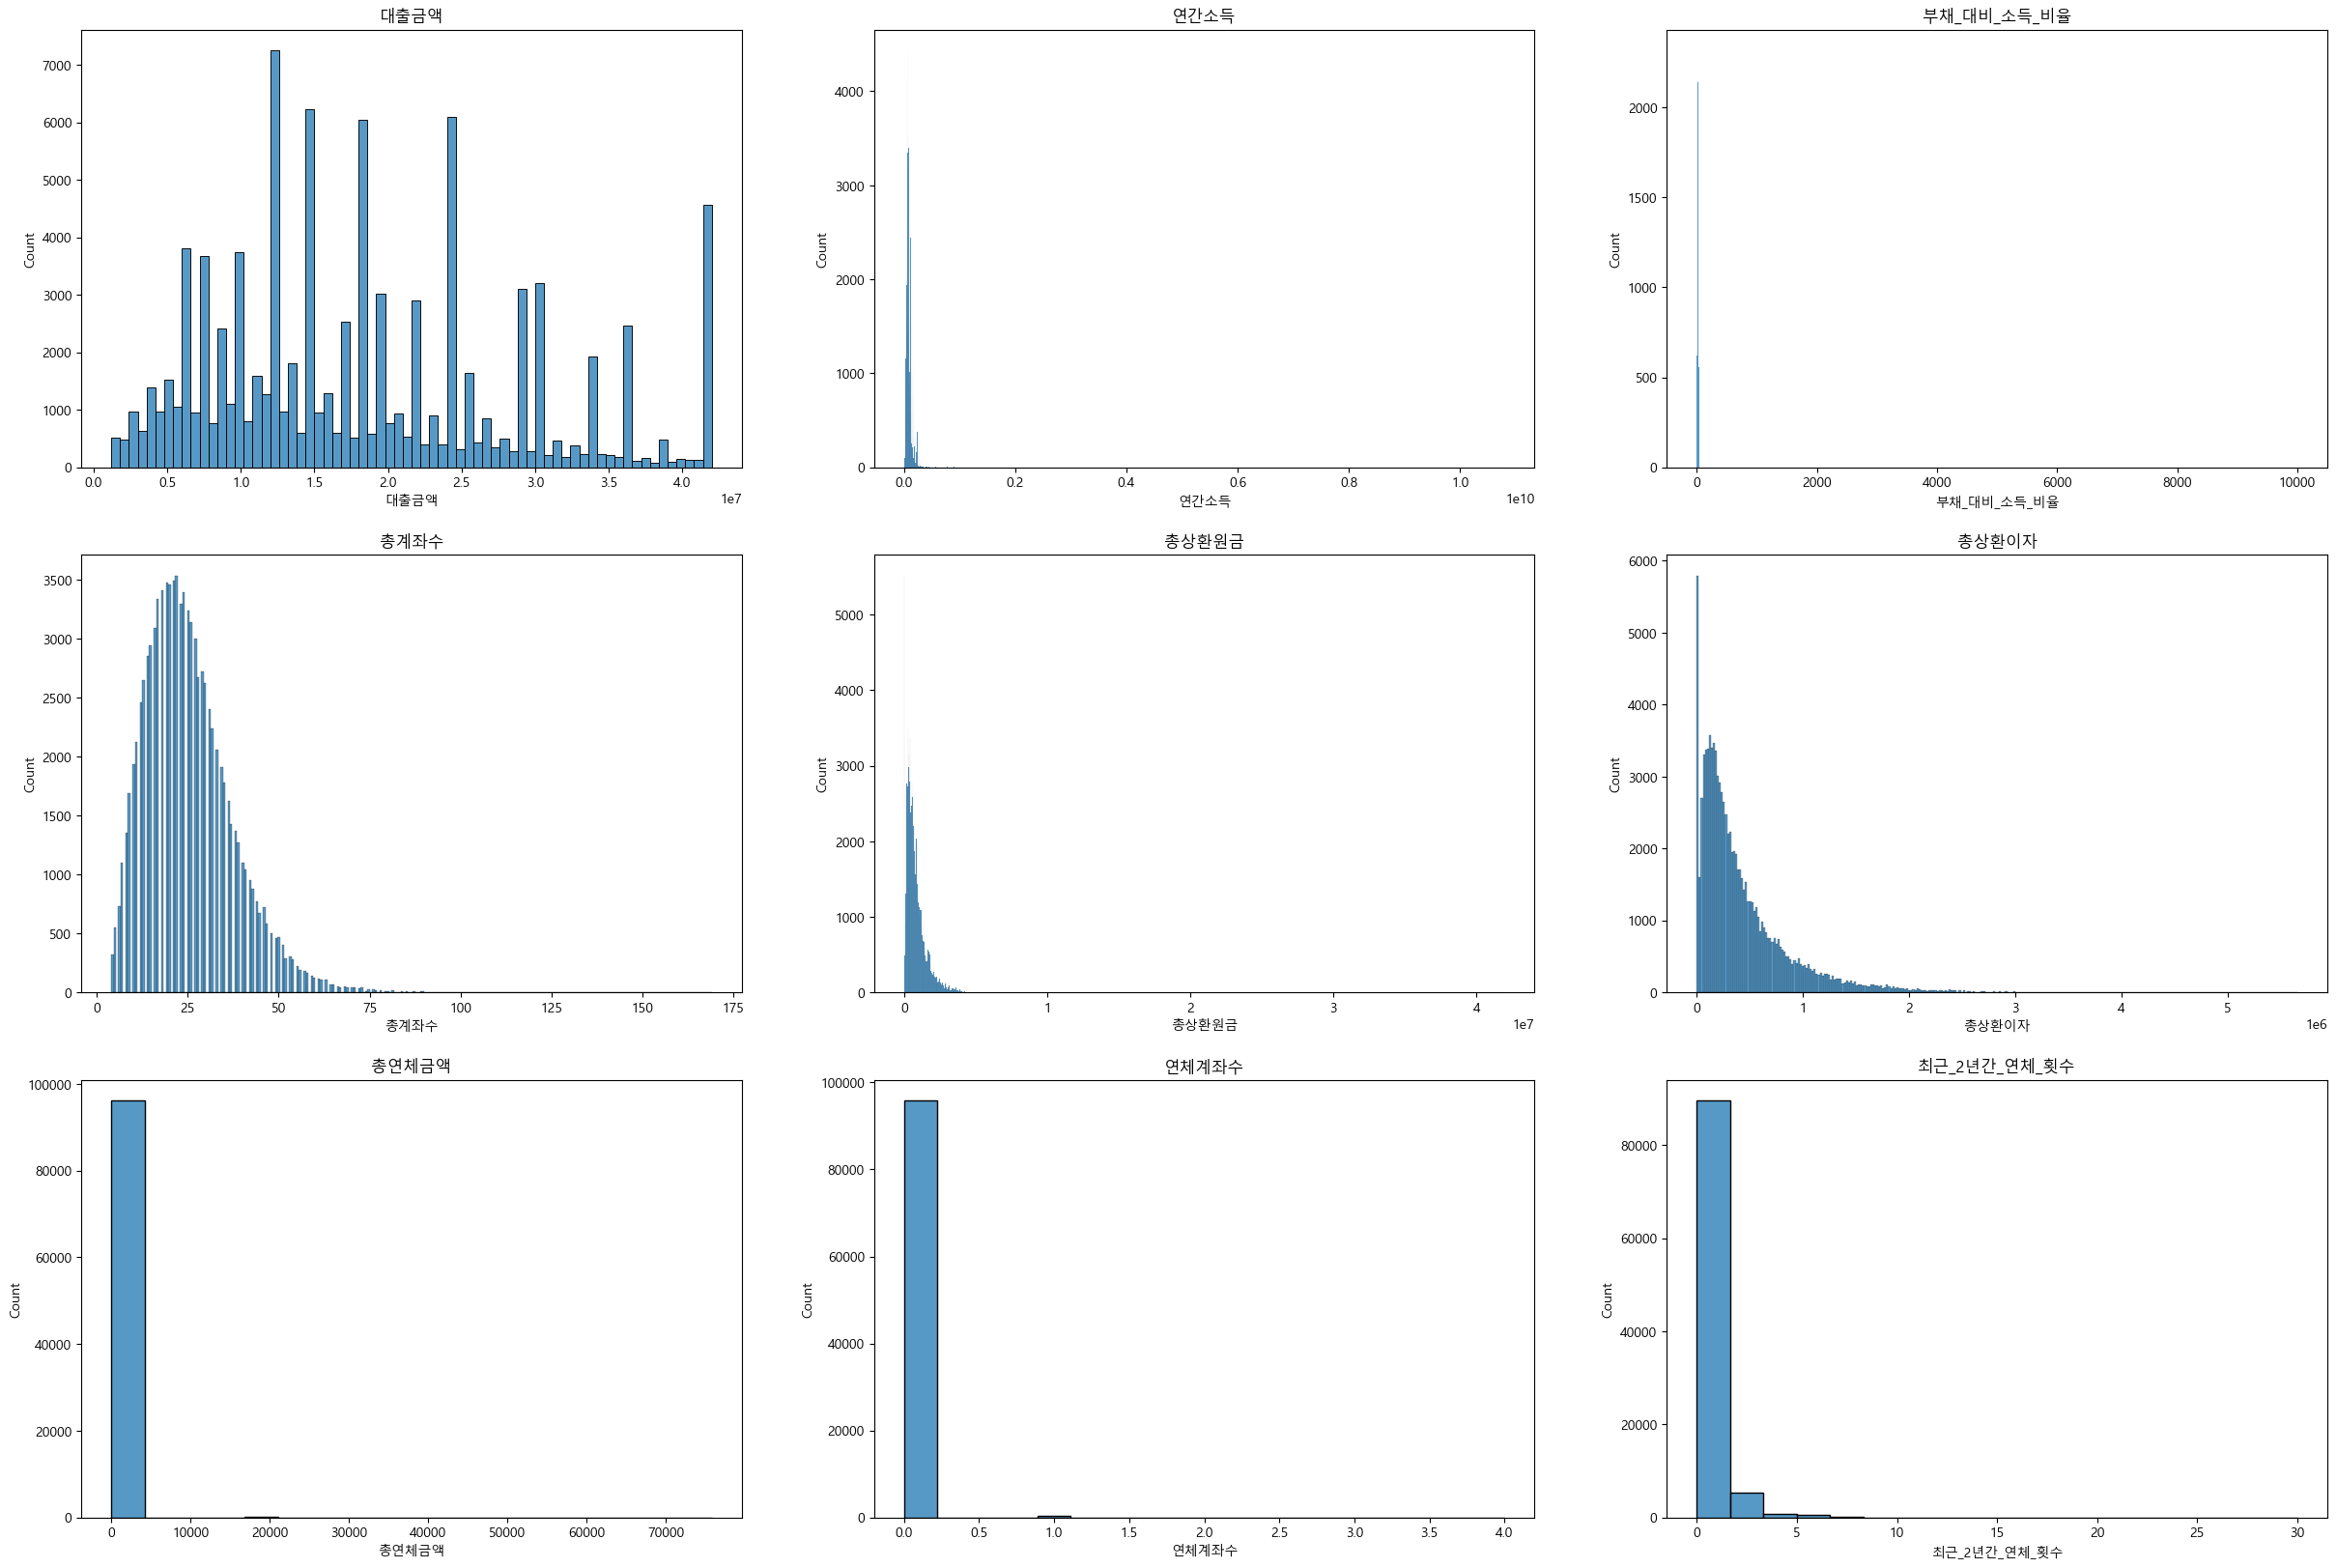

In [11]:
# subplot으로 여러 그래프 한 번에 그리기
fig, ax = plt.subplots(3,3, figsize=(30,20))

sns.histplot(css_df, x='대출금액', ax=ax[0,0]).set_title('대출금액')
sns.histplot(css_df, x='연간소득', ax=ax[0,1]).set_title('연간소득')
sns.histplot(css_df, x='부채_대비_소득_비율', ax=ax[0,2]).set_title('부채_대비_소득_비율')
sns.histplot(css_df, x='총계좌수', ax=ax[1,0]).set_title('총계좌수')
sns.histplot(css_df, x='총상환원금', ax=ax[1,1]).set_title('총상환원금')
sns.histplot(css_df, x='총상환이자', ax=ax[1,2]).set_title('총상환이자')
sns.histplot(css_df, x='총연체금액', ax=ax[2,0]).set_title('총연체금액')
sns.histplot(css_df, x='연체계좌수', ax=ax[2,1]).set_title('연체계좌수')
sns.histplot(css_df, x='최근_2년간_연체_횟수', ax=ax[2,2]).set_title('최근_2년간_연체_횟수')

- 분포
    - [대출금액], [총계좌수]의 분포는 그나마 안정적
    - 그 외 카테고리들은 분포가 한 쪽으로 치우쳐져 있고, 이상치들이 존재함
        - 제거해야할 이상치의 기준을 어느 정도 선으로 잡아야 할지 고민됨
- 단위
    - [대출금액], [연간소득], [총상환원금], [총상환이자]는 숫자가 너무 커서 그런지 단위가 1e7 이런 식임

#### 위에 기술통계량 보고 생각한 것들 다시 가져옴

- min 특이사항
    - [연간소득]이 0원인 사람도 있음
    - [부채_대비_소득_비율]이 0원인 사람도 있음
    - 그런데 계좌는 적어도 4개 가지고 있음
- max 특이사항
    - [부채_대비_소득_비율]이 9999임  .. 뭐지?
    - [총계좌수] 분포의 75%사람까지는 32개였다가 갑자기 max로 169개를 가진 사람이 등장함
    - [총연체금액]이 0000이다가 갑자기 max값이 75768임

In [59]:
# (참고) 이상치 제거할 때 쓸 파이썬 코드
# df[ df['column'] > limit_value]

In [12]:
# 연간소득이 0원이 사람 찾기
# 이 분 부채_대비_소득_비율이 9999인데??
css_df[css_df['연간소득'] == 0]

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
12498,TRAIN_12498,4440000,36 months,Unknown,MORTGAGE,0,9999.0,20,신용 카드,2,205356,85884.0,0.0,0.0,C


In [13]:
# 부채_대비_소득_비율이 9999인 사람 찾기
# 위에 소득이 0인 그 사람이네
css_df[css_df['부채_대비_소득_비율'] == 9999.0]

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
12498,TRAIN_12498,4440000,36 months,Unknown,MORTGAGE,0,9999.0,20,신용 카드,2,205356,85884.0,0.0,0.0,C


In [14]:
# 총계좌수 32개 초과인 사람 찾기
# 엄청 많네..?
css_df[css_df['총계좌수'] > 32]

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
7,TRAIN_00007,12000000,60 months,2 years,RENT,66000000,14.73,45,부채 통합,0,557232,566136.0,0.0,0.0,C
17,TRAIN_00017,9600000,36 months,8 years,RENT,74400000,11.98,35,부채 통합,0,476016,116268.0,0.0,0.0,A
22,TRAIN_00022,12000000,60 months,<1 year,MORTGAGE,62400000,21.05,36,부채 통합,0,252300,343428.0,0.0,0.0,D
24,TRAIN_00024,20670000,60 months,7 years,RENT,61200000,20.33,36,기타,0,527244,1292412.0,0.0,0.0,G
25,TRAIN_00025,24000000,36 months,1 year,MORTGAGE,140400000,29.27,35,부채 통합,0,1790916,451152.0,0.0,0.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96269,TRAIN_96269,26040000,36 months,10+ years,RENT,84000000,20.90,46,부채 통합,0,1960620,418800.0,0.0,0.0,A
96273,TRAIN_96273,33600000,36 months,2 years,MORTGAGE,222000000,17.43,49,신용 카드,0,1706676,333360.0,0.0,0.0,A
96282,TRAIN_96282,28800000,60 months,1 year,RENT,126000000,18.05,41,소규모 사업,0,307848,380580.0,0.0,0.0,D
96286,TRAIN_96286,42000000,60 months,2 years,MORTGAGE,244800000,18.80,51,부채 통합,0,1902036,2075832.0,0.0,0.0,D


In [15]:
# 총연체금액 10000 넘는 사람 찾기
css_df[css_df['총연체금액'] > 10000]

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
122,TRAIN_00122,11460000,36 months,10+ years,RENT,38400000,32.56,35,부채 통합,0,461676,398172.0,21792.0,0.0,E
671,TRAIN_00671,13440000,60 months,9 years,OWN,127200000,22.59,28,신용 카드,1,713760,1001016.0,18000.0,0.0,E
946,TRAIN_00946,15240000,36 months,2 years,RENT,74400000,16.45,48,신용 카드,0,1159212,260448.0,46536.0,0.0,A
1914,TRAIN_01914,17580000,60 months,10+ years,MORTGAGE,90000000,27.18,29,부채 통합,2,632292,1366848.0,25284.0,0.0,F
1975,TRAIN_01975,28800000,60 months,10+ years,MORTGAGE,276000000,17.24,33,부채 통합,0,660552,714312.0,33996.0,0.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93704,TRAIN_93704,19200000,36 months,4 years,RENT,64800000,10.73,26,신용 카드,0,1880496,558060.0,30600.0,0.0,B
93752,TRAIN_93752,20400000,36 months,9 years,MORTGAGE,150000000,12.18,18,부채 통합,3,2024784,479856.0,32052.0,0.0,B
93775,TRAIN_93775,5760000,36 months,4 years,RENT,42158400,26.97,19,부채 통합,0,403488,174936.0,18000.0,0.0,C
94549,TRAIN_94549,30000000,60 months,10+ years,MORTGAGE,102000000,7.03,14,소규모 사업,1,1262292,1740480.0,38292.0,0.0,E


In [16]:
# 총연체금액 30000 넘는 사람 찾기
css_df[css_df['총연체금액'] > 30000]

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
946,TRAIN_00946,15240000,36 months,2 years,RENT,74400000,16.45,48,신용 카드,0,1159212,260448.0,46536.0,0.0,A
1975,TRAIN_01975,28800000,60 months,10+ years,MORTGAGE,276000000,17.24,33,부채 통합,0,660552,714312.0,33996.0,0.0,C
2485,TRAIN_02485,36000000,60 months,10+ years,MORTGAGE,90000000,6.91,14,주택 개선,0,1620456,5653416.0,52308.0,0.0,F
2959,TRAIN_02959,30000000,36 months,Unknown,MORTGAGE,71568000,28.87,24,신용 카드,0,2254236,511236.0,46500.0,0.0,A
3526,TRAIN_03526,25920000,36 months,6 years,RENT,168000000,8.42,20,신용 카드,0,1066728,497808.0,40716.0,0.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90885,TRAIN_90885,36000000,60 months,10+ years,MORTGAGE,94200000,21.30,98,주택 개선,0,924276,2230740.0,48000.0,0.0,F
92402,TRAIN_92402,25200000,60 months,3 years,MORTGAGE,204000000,25.60,26,부채 통합,0,557472,1548468.0,30636.0,0.0,D
93704,TRAIN_93704,19200000,36 months,4 years,RENT,64800000,10.73,26,신용 카드,0,1880496,558060.0,30600.0,0.0,B
93752,TRAIN_93752,20400000,36 months,9 years,MORTGAGE,150000000,12.18,18,부채 통합,3,2024784,479856.0,32052.0,0.0,B


In [17]:
# 총연체금액 50000 넘는 사람 찾기
css_df[css_df['총연체금액'] > 50000]

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
2485,TRAIN_02485,36000000,60 months,10+ years,MORTGAGE,90000000,6.91,14,주택 개선,0,1620456,5653416.0,52308.0,0.0,F
4351,TRAIN_04351,21840000,60 months,10+ years,MORTGAGE,144000000,21.60,21,부채 통합,2,516048,452856.0,50064.0,0.0,C
5131,TRAIN_05131,42000000,36 months,3 years,RENT,108000000,24.24,12,소규모 사업,0,2711016,3233364.0,75768.0,0.0,D
19260,TRAIN_19260,31200000,36 months,Unknown,MORTGAGE,103200000,14.57,14,부채 통합,0,2178000,922548.0,52032.0,0.0,C
19586,TRAIN_19586,38280000,36 months,3 years,RENT,91200000,26.74,20,주택 개선,0,791760,2122584.0,74076.0,0.0,F
29298,TRAIN_29298,30000000,36 months,Unknown,MORTGAGE,76800000,15.30,30,신용 카드,2,3372348,1844952.0,52428.0,1.0,D
34355,TRAIN_34355,29430000,36 months,10+ years,OWN,72000000,8.34,17,주택 개선,0,626724,527280.0,52884.0,0.0,D
35250,TRAIN_35250,20400000,60 months,6 years,RENT,86400000,24.17,14,신용 카드,0,1028844,1060428.0,75216.0,0.0,B
36759,TRAIN_36759,42000000,60 months,2 years,RENT,84000000,35.57,30,부채 통합,0,890028,1182444.0,52836.0,0.0,D
38695,TRAIN_38695,24000000,36 months,10+ years,MORTGAGE,90000000,21.07,32,부채 통합,0,2281524,846288.0,57276.0,0.0,B


### 수치형 데이터 전처리(스케일링)

In [ ]:
# 아직 이상값 정리도 안해서 실행 노노
# 스케일링 해주는 게 맞을까?

def get_numeric_sc(df):
    # sd_sc: 연간소득, 부채_대비_소득_비율, 최근_2년간_연체_횟수, 총상환원금, 총상환이자, 총연체금액, 연체계좌수
    # mm_sc: 대출금액, 총계좌수
    from sklearn.preprocessing import StandardScaler, MinMaxScaler
    
    sc_list = ['연간소득', '부채_대비_소득_비율', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수']    
    for i in sc_list:
        sd_sc = StandardScaler()
        sd_sc.fit(df[[i]])
        df[i] = sd_sc.transform(df[[i]])
    
    mm_list = ['대출금액', '총계좌수']
    for j in mm_list:
        mm_sc = MinMaxScaler()
        mm_sc.fit(df[[j]])  
        df[j] = mm_sc.transform(df[[j]])
    
    return df

In [ ]:
get_numeric_sc(css_df).describe()

# 가설 정리

- 총상환금액 대비 연체금액이 높을수록 대출등급이 낮을 것이다.

In [22]:
# 총상환금_대비_총연체금
# 총상환금 = 총상환원금 + 총상환이자

css_df['총상환금_대비_총연체금'] = css_df['총연체금액'] / (css_df['총상환원금'] + css_df['총상환이자'])
css_df.head()

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급,총상환금_대비_총연체금
0,TRAIN_00000,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C,NaN
1,TRAIN_00001,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B,0.0
2,TRAIN_00002,12000000,36 months,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A,0.0
3,TRAIN_00003,14400000,36 months,8 years,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C,0.0
4,TRAIN_00004,18000000,60 months,Unknown,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B,0.0


In [32]:
css_df[css_df['총연체금액'] > 50000]

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급,총상환금_대비_총연체금
2485,TRAIN_02485,36000000,60 months,10+ years,MORTGAGE,90000000,6.91,14,주택 개선,0,1620456,5653416.0,52308.0,0.0,F,0.007191
4351,TRAIN_04351,21840000,60 months,10+ years,MORTGAGE,144000000,21.60,21,부채 통합,2,516048,452856.0,50064.0,0.0,C,0.051671
5131,TRAIN_05131,42000000,36 months,3 years,RENT,108000000,24.24,12,소규모 사업,0,2711016,3233364.0,75768.0,0.0,D,0.012746
19260,TRAIN_19260,31200000,36 months,Unknown,MORTGAGE,103200000,14.57,14,부채 통합,0,2178000,922548.0,52032.0,0.0,C,0.016782
19586,TRAIN_19586,38280000,36 months,3 years,RENT,91200000,26.74,20,주택 개선,0,791760,2122584.0,74076.0,0.0,F,0.025418
29298,TRAIN_29298,30000000,36 months,Unknown,MORTGAGE,76800000,15.30,30,신용 카드,2,3372348,1844952.0,52428.0,1.0,D,0.010049
34355,TRAIN_34355,29430000,36 months,10+ years,OWN,72000000,8.34,17,주택 개선,0,626724,527280.0,52884.0,0.0,D,0.045827
35250,TRAIN_35250,20400000,60 months,6 years,RENT,86400000,24.17,14,신용 카드,0,1028844,1060428.0,75216.0,0.0,B,0.036001
36759,TRAIN_36759,42000000,60 months,2 years,RENT,84000000,35.57,30,부채 통합,0,890028,1182444.0,52836.0,0.0,D,0.025494
38695,TRAIN_38695,24000000,36 months,10+ years,MORTGAGE,90000000,21.07,32,부채 통합,0,2281524,846288.0,57276.0,0.0,B,0.018312


- 부채_대비_소득_비율이 높은 사람이 대출등급이 높을 것이다.

In [24]:
css_df[css_df['부채_대비_소득_비율'] > 20]

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급,총상환금_대비_총연체금
1,TRAIN_00001,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B,0.0
4,TRAIN_00004,18000000,60 months,Unknown,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B,0.0
8,TRAIN_00008,9840000,36 months,10+ years,OWN,45600000,20.27,11,의료,0,425928,266352.0,0.0,0.0,D,0.0
15,TRAIN_00015,8640000,36 months,4 years,RENT,92400000,20.40,17,의료,0,196980,88572.0,0.0,0.0,C,0.0
18,TRAIN_00018,12000000,36 months,Unknown,MORTGAGE,25200000,36.57,20,부채 통합,0,554196,259344.0,0.0,0.0,C,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96269,TRAIN_96269,26040000,36 months,10+ years,RENT,84000000,20.90,46,부채 통합,0,1960620,418800.0,0.0,0.0,A,0.0
96271,TRAIN_96271,17280000,36 months,5 years,OWN,39600000,34.04,5,신용 카드,0,1210428,506820.0,0.0,0.0,C,0.0
96280,TRAIN_96280,42000000,60 months,10+ years,MORTGAGE,85200000,30.53,23,신용 카드,0,1017708,817236.0,0.0,0.0,C,0.0
96283,TRAIN_96283,9600000,36 months,1 year,MORTGAGE,48000000,39.36,25,부채 통합,0,656028,320712.0,0.0,0.0,C,0.0


- 총계좌수가 많은 사람이 대출등급이 높을 것이다.

In [25]:
css_df[css_df['총계좌수'] > 20]

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급,총상환금_대비_총연체금
1,TRAIN_00001,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B,0.0
5,TRAIN_00005,4800000,36 months,10+ years,RENT,84000000,13.78,30,휴가,0,240216,55428.0,0.0,0.0,A,0.0
6,TRAIN_00006,3600000,36 months,9 years,MORTGAGE,55200000,16.12,22,휴가,0,77892,46344.0,0.0,0.0,D,0.0
7,TRAIN_00007,12000000,60 months,2 years,RENT,66000000,14.73,45,부채 통합,0,557232,566136.0,0.0,0.0,C,0.0
9,TRAIN_00009,2880000,36 months,2 years,RENT,72000000,10.02,26,자동차,0,268848,115572.0,0.0,0.0,C,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96288,TRAIN_96288,21150000,36 months,Unknown,MORTGAGE,50400000,34.89,29,부채 통합,10,1481496,620328.0,0.0,0.0,C,0.0
96289,TRAIN_96289,14400000,36 months,10+ years,MORTGAGE,210000000,9.33,33,신용 카드,0,974580,492168.0,0.0,0.0,C,0.0
96290,TRAIN_96290,28800000,60 months,10+ years,MORTGAGE,132000000,5.16,25,주택 개선,0,583728,855084.0,0.0,0.0,E,0.0
96291,TRAIN_96291,14400000,36 months,1 year,MORTGAGE,84000000,11.24,22,신용 카드,0,1489128,241236.0,0.0,0.0,A,0.0


- 부채_대비_소득_비율과 총계좌수가 많은 사람이 대출등급이 높을 것이다.

In [28]:
# ???
css_df[(css_df['부채_대비_소득_비율'] > 20) & (css_df['총계좌수'] > 20)].groupby('대출등급').count()

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,총상환금_대비_총연체금
대출등급,,,,,,,,,,,,,,,
A,4216,4216,4216,4216,4216,4216,4216,4216,4216,4216,4216,4216,4216,4216,4000
B,8252,8252,8252,8252,8252,8252,8252,8252,8252,8252,8252,8252,8252,8252,7737
C,8965,8965,8965,8965,8965,8965,8965,8965,8965,8965,8965,8965,8965,8965,8417
D,5065,5065,5065,5065,5065,5065,5065,5065,5065,5065,5065,5065,5065,5065,4782
E,2835,2835,2835,2835,2835,2835,2835,2835,2835,2835,2835,2835,2835,2835,2679
F,775,775,775,775,775,775,775,775,775,775,775,775,775,775,725
G,158,158,158,158,158,158,158,158,158,158,158,158,158,158,152
